<a href="https://www.kaggle.com/code/ahmedmzaid/recognizing-similar-text?scriptVersionId=146556199" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import Required libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import string
import nltk
import pickle
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from tqdm import tqdm
!pip install gradio
import gradio as gr
ps = PorterStemmer() # stemming
stopwords = nltk.corpus.stopwords.words('english')
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 43.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 5.3 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5596 sha256=08dc085a8bd09fc0a9062481d2fcc8f62c82e94e9e6bb59b89421f530b269ff9
  Stored in directory: /root/.cache/pip/wheels/01/a6/d1/1c0828c304a4283b2c1639a09ad86f83d7c487ef34c6b4a1bf
Successfully built ffmpy
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.4.0
    Uninstalling fsspec-20

# Read Dataset

In [2]:
data = pd.read_csv("/kaggle/input/quora-question-pairs/train.csv.zip")

In [3]:
pd.set_option('display.max_colwidth',100)
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


In [4]:
data.rename(columns ={'is_duplicate':'similar'}, inplace = True)

# Remove Unwanted Columns

In [5]:
data.drop(['id','qid1','qid2'],axis=1,inplace=True)

In [6]:
data.head()

,question1,question2,similar
0,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


0    255027
1    149263
Name: similar, dtype: int64
0    63.080215
1    36.919785
Name: similar, dtype: float64


<AxesSubplot: >

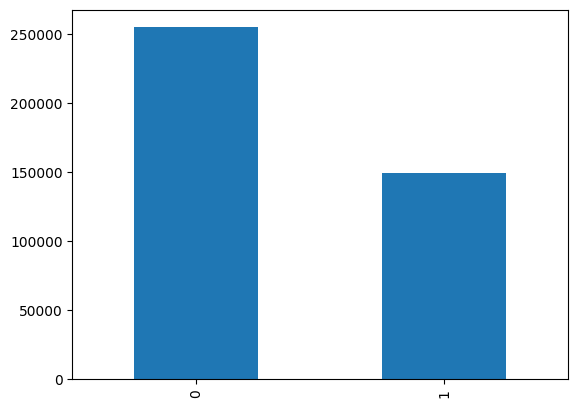

In [7]:
# Number of similar Questions and Not Similar Questions
print(data['similar'].value_counts())
print((data['similar'].value_counts()/data['similar'].count())*100)
data['similar'].value_counts().plot(kind='bar')

# Checking if there is null rows in data...

In [8]:
data.isnull().sum()

question1    1
question2    2
similar      0
dtype: int64

In [9]:
data[data.question1.isnull()]

,question1,question2,similar
363362,NaN,My Chinese name is Haichao Yu. What English name is most suitable for me considering the pronoun...,0


In [10]:
data[data.question2.isnull()]

,question1,question2,similar
105780,How can I develop android app?,NaN,0
201841,How can I create an Android app?,NaN,0


In [11]:
data.dtypes

question1    object
question2    object
similar       int64
dtype: object

In [12]:
print(len(data))

404290


# Removing null data.

In [7]:
mask = data.isnull().any(axis = 1)
data = data[~mask]

In [14]:
print(len(data))
data.dtypes

404287


question1    object
question2    object
similar       int64
dtype: object

In [8]:
lables=data['similar']

# Rebalance the data..

* x_pos= Similar Questions.
* x_neg= not similar Questions.

In [9]:
x_pos= data[['question1','question2','similar']][lables==1]
x_pos

,question1,question2,similar
5,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",1
7,How can I be a good geologist?,What should I do to be a great geologist?,1
11,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,What was your first sexual experience like?,What was your first sexual experience?,1
...,...,...,...
404280,What are some outfit ideas to wear to a frat party?,What are some outfit ideas wear to a frat themed party?,1
404281,Why is Manaphy childish in Pokémon Ranger and the Temple of the Sea?,Why is Manaphy annoying in Pokemon ranger and the temple of the sea?,1
404282,How does a long distance relationship work?,How are long distance relationships maintained?,1
404284,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexuality?,1


In [10]:
x_neg= data[['question1','question2','similar']][lables==0]
x_neg

,question1,question2,similar
0,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0
...,...,...,...
404283,What do you think of the removal of the MagSafe connector from Apple's 2016 MacBook Pro?,What will the CPU upgrade to the 2016 Apple MacBook Pro mean?,0
404285,How many keywords are there in the Racket programming language of the latest version?,How many keywords are there in PERL Programming Language in the latest version?,0
404287,What is one coin?,What's this coin?,0
404288,"What is the approx annual cost of living while studying in UIC Chicago, for an Indian student?",I am having little hairfall problem but I want to use hair styling product. Which one should I p...,0


In [11]:
print(x_pos.shape)
print(x_neg.shape)

(149263, 3)
(255024, 3)


# Choose a Sample of Data 

In [12]:
dff=pd.concat([x_pos[:32000],x_neg[:32000]],axis=0)

In [13]:
# delete unused variable 
del x_pos
del x_neg

In [14]:
dff.shape

(64000, 3)

In [15]:
dff

,question1,question2,similar
5,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",1
7,How can I be a good geologist?,What should I do to be a great geologist?,1
11,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,What was your first sexual experience like?,What was your first sexual experience?,1
...,...,...,...
51002,What universities does Home Properties recruit new grads from? What majors are they looking for?,What universities does Parkway Properties recruit new grads from? What majors are they looking for?,0
51007,Should I watch Arrow before I watch The Flash TV series?,"Which TV series should I watch among The Flash, Arrow, Heroes, Daredevil and Smallville?",0
51008,What are the similarities between dystopias and utopias?,What's a good example of an utopia in fiction that turns out to be a dystopia?,0
51009,What is jaywalking?,Where is jaywalking illegal?,0


In [16]:
# Shuffle and Reset index of data
dff=dff.sample(frac=1).reset_index(drop=True)

In [17]:
dff

,question1,question2,similar
0,Does how a language sound represent the character of the nation?,What were the strangest things about 2016?,0
1,9 lakh per annum in Delhi would be decent salary?,Do boys get hints?,0
2,What would happen if Trump doesn't concede to Clinton? Why is this issue all over the news right...,What would happen if Donald Trump lost and refused to concede the election?,1
3,How do I take decision?,How can I take a decision?,0
4,What should be the first computer language I learn?,What should be the first programming language I learn?,1
...,...,...,...
63995,"How close are we to World War Three, and how bad would it be?",How close is a World War III?,1
63996,How can I be indifferent to what people think of me?,"As an individual, do I really need to care what people think about me?",1
63997,How can I stop my dog from humping my furniture?,How do I stop my Labrador/Pug mix from humping my pillows?,1
63998,How do you treat a pimple that's under a mole?,How do you treat ingrown pimples on your face?,0


In [18]:
laples = dff['similar']
dff.drop(columns=['similar'],inplace=True)

In [19]:
print(laples.shape)
print(dff.shape)

(64000,)
(64000, 2)


In [20]:
dff.head()

,question1,question2
0,Does how a language sound represent the character of the nation?,What were the strangest things about 2016?
1,9 lakh per annum in Delhi would be decent salary?,Do boys get hints?
2,What would happen if Trump doesn't concede to Clinton? Why is this issue all over the news right...,What would happen if Donald Trump lost and refused to concede the election?
3,How do I take decision?,How can I take a decision?
4,What should be the first computer language I learn?,What should be the first programming language I learn?


# Concatinate Question1 and Question2

In [24]:
df = pd.DataFrame(dff['question1']+' eof '+dff['question2'],columns=['questions'])

# Convert data to Lower case

In [25]:
df.questions = [i.lower() for i in df.questions ]

In [26]:
df.head()

,questions
0,does how a language sound represent the character of the nation? eof what were the strangest thi...
1,9 lakh per annum in delhi would be decent salary? eof do boys get hints?
2,what would happen if trump doesn't concede to clinton? why is this issue all over the news right...
3,how do i take decision? eof how can i take a decision?
4,what should be the first computer language i learn? eof what should be the first programming lan...


# **Cleaning data :-**
### * Tokenization
### * Stemming 
### * Remove Punctuation

In [28]:
a=[]
for sen in tqdm(df['questions']):
    token = word_tokenize(sen)
    tokens_stem = [ps.stem(word) for word in token]
    sen = ' '.join(i for i in tokens_stem if i not in string.punctuation)
    a.append(sen)


100%|██████████| 64000/64000 [00:41<00:00, 1555.76it/s]


# TF-IDF Vectorization

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
tfidf_vec_fit = tfidf_vec.fit(a)
X_tfidf = tfidf_vec.fit_transform(a)
print(X_tfidf.shape)
df = pd.DataFrame(X_tfidf.toarray(),columns=tfidf_vec.get_feature_names_out())
df.head()

(64000, 26155)


,00,000,000k,000webhost,0015,0019,0021,003sc,008,00am,...,精神,自欺欺人,色迷迷的,还能靠什么支撑自己走下去,釣魚島,飛簷走壁,高铁,북쪽앟관자키,분위기,슬마
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
del a
import gc
gc.collect()

615

# **Feature Engineering**
### *count common words
### *count total words 
### *word length
### *punctuation percentage 
### *count stopwords 

In [31]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [32]:
df['word_common'] = dff.apply(common_words, axis=1)
df.head()

,00,000,000k,000webhost,0015,0019,0021,003sc,008,00am,...,自欺欺人,色迷迷的,还能靠什么支撑自己走下去,釣魚島,飛簷走壁,高铁,북쪽앟관자키,분위기,슬마,word_common
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [33]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [34]:
df['word_total'] = dff.apply(total_words, axis=1)
df.head()

,00,000,000k,000webhost,0015,0019,0021,003sc,008,00am,...,色迷迷的,还能靠什么支撑自己走下去,釣魚島,飛簷走壁,高铁,북쪽앟관자키,분위기,슬마,word_common,word_total
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,17
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,32
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,11
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,18


In [35]:
df['q1_len']=dff['question1'].str.len()
df['q2_len']=dff['question2'].str.len()
df.head()

,00,000,000k,000webhost,0015,0019,0021,003sc,008,00am,...,釣魚島,飛簷走壁,高铁,북쪽앟관자키,분위기,슬마,word_common,word_total,q1_len,q2_len
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,17,64,42
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,14,49,18
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,32,101,75
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,11,23,26
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,18,51,54


In [36]:
df['q1_word']=dff['question1'].apply(lambda x: len(x.split(" ")))
df['q2_word']=dff['question2'].apply(lambda x: len(x.split(" ")))
df.head()

,00,000,000k,000webhost,0015,0019,0021,003sc,008,00am,...,高铁,북쪽앟관자키,분위기,슬마,word_common,word_total,q1_len,q2_len,q1_word,q2_word
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,17,64,42,11,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,14,49,18,10,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8,32,101,75,19,13
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,11,23,26,5,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8,18,51,54,9,9


In [37]:
def punctuation_count(txt):
    count= sum([1 for c in txt if c in string.punctuation])
    return (count / len(txt)) * 100

In [38]:
df['q1_punctuation'] = dff['question1'].apply(lambda x: punctuation_count(x))
df['q2_punctuation'] = dff['question2'].apply(lambda x: punctuation_count(x))
df.head()

,00,000,000k,000webhost,0015,0019,0021,003sc,008,00am,...,분위기,슬마,word_common,word_total,q1_len,q2_len,q1_word,q2_word,q1_punctuation,q2_punctuation
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,17,64,42,11,7,1.562500,2.380952
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,14,49,18,10,4,2.040816,5.555556
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8,32,101,75,19,13,2.970297,1.333333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4,11,23,26,5,6,4.347826,3.846154
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8,18,51,54,9,9,1.960784,1.851852


In [39]:
def stopwords_count(txt):
    token = word_tokenize(txt)
    count= [i for i in token if i in stopwords]
    return len(count)

In [40]:
df['q1_stopwords'] = dff['question1'].apply(lambda x: stopwords_count(x))
df['q2_stopwords'] = dff['question2'].apply(lambda x: stopwords_count(x))
df.head()

,00,000,000k,000webhost,0015,0019,0021,003sc,008,00am,...,word_common,word_total,q1_len,q2_len,q1_word,q2_word,q1_punctuation,q2_punctuation,q1_stopwords,q2_stopwords
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,17,64,42,11,7,1.562500,2.380952,5,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,14,49,18,10,4,2.040816,5.555556,2,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,32,101,75,19,13,2.970297,1.333333,9,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,11,23,26,5,6,4.347826,3.846154,1,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,18,51,54,9,9,1.960784,1.851852,3,3


In [41]:
df.head()

,00,000,000k,000webhost,0015,0019,0021,003sc,008,00am,...,word_common,word_total,q1_len,q2_len,q1_word,q2_word,q1_punctuation,q2_punctuation,q1_stopwords,q2_stopwords
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,17,64,42,11,7,1.562500,2.380952,5,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,14,49,18,10,4,2.040816,5.555556,2,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,32,101,75,19,13,2.970297,1.333333,9,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,11,23,26,5,6,4.347826,3.846154,1,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,18,51,54,9,9,1.960784,1.851852,3,3


# Modeling

In [42]:
from sklearn.model_selection import train_test_split
data_tfidf_train, data_tfidf_test, label_train, label_test = train_test_split(df, laples, test_size=0.3, random_state=42)

In [43]:
del dff
del df
del laples
gc.collect()

0

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, accuracy_score,confusion_matrix,classification_report

**Decision tree classifier is a machine learning algorithm used for classification tasks, which constructs a tree-like model by recursively splitting the dataset based on input features to maximize information gain. It is popular because it is easy to interpret and can handle both categorical and numerical data, and can be used for both binary and multi-class classification tasks.**

In [48]:
recognize_similar = tree.DecisionTreeClassifier().fit(data_tfidf_train, label_train)
pred_test_MNB = recognize_similar.predict(data_tfidf_test)
precision = precision_score(label_test, pred_test_MNB)
recall = recall_score(label_test, pred_test_MNB)
accuracy = accuracy_score(label_test, pred_test_MNB)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(label_test,pred_test_MNB))
print (classification_report(label_test, pred_test_MNB))

Precision: 0.715 / Recall: 0.742 / Accuracy: 0.726
[[6866 2814]
 [2454 7066]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      9680
           1       0.72      0.74      0.73      9520

    accuracy                           0.73     19200
   macro avg       0.73      0.73      0.73     19200
weighted avg       0.73      0.73      0.73     19200



**Random Forest is an ensemble learning algorithm used for classification, regression and other tasks. It combines multiple decision trees that are trained on random subsets of input data and features, and aggregates their predictions to make a final prediction. It is accurate, can handle large datasets, and is less prone to overfitting than individual decision trees, and is commonly used in various applications.**

In [45]:
recognize_similar = RandomForestClassifier().fit(data_tfidf_train, label_train)
pred_test_MNB = recognize_similar.predict(data_tfidf_test)
precision = precision_score(label_test, pred_test_MNB)
recall = recall_score(label_test, pred_test_MNB)
accuracy = accuracy_score(label_test, pred_test_MNB)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(label_test,pred_test_MNB))
print (classification_report(label_test, pred_test_MNB))

Precision: 0.747 / Recall: 0.828 / Accuracy: 0.774
[[6946 2681]
 [1649 7924]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      9627
           1       0.75      0.83      0.79      9573

    accuracy                           0.77     19200
   macro avg       0.78      0.77      0.77     19200
weighted avg       0.78      0.77      0.77     19200



# Test not similar

In [50]:
text = 'What is the minimum time required to build a flyover of about 1km?'
text2= 'What is a cheaper and quicker way to build an underpass or a flyover and why?'

In [51]:
def prepare_data(text,text2):
    z = pd.DataFrame([text],columns=['question1'])
    z.insert(1, 'question2', text2, True)

    y = pd.DataFrame([text+' eof '+text2],columns=['questions'])
    y.questions = [i.lower() for i in y.questions ]
    X = tfidf_vec_fit.transform(y['questions'])
    dft = pd.DataFrame(X.toarray(),columns=tfidf_vec.get_feature_names_out())

    dft['word_common'] = z.apply(common_words, axis=1)
    dft['word_total'] = z.apply(total_words, axis=1)
    #word len
    dft['q1_len']=z['question1'].str.len()
    dft['q2_len']=z['question2'].str.len()
    #word count
    dft['q1_word']=z['question1'].apply(lambda x: len(x.split(" ")))
    dft['q2_word']=z['question2'].apply(lambda x: len(x.split(" ")))

    dft['q1_punctuation'] = z['question1'].apply(lambda x: punctuation_count(x))
    dft['q2_punctuation'] = z['question2'].apply(lambda x: punctuation_count(x))

    dft['q1_stopwords'] = z['question1'].apply(lambda x: stopwords_count(x))
    dft['q2_stopwords'] = z['question2'].apply(lambda x: stopwords_count(x))
    return dft

In [53]:
dft= prepare_data(text,text2)
pred = recognize_similar.predict(dft)
if pred[0]==1:
    print('similar')
else:
    print('not similar')
print(pred[0])

not similar
0


# Test similar

In [54]:
text = 'How do I reset a Toshiba laptop?'
text2= 'How do you troubleshoot a Toshiba laptop?'

In [55]:
dft= prepare_data(text,text2)
pred = recognize_similar.predict(dft)
if pred[0]==1:
    print('similar')
else:
    print('not similar')
print(pred[0])

similar
1


# Save model

In [56]:
import pickle
with open('tfidf_vec_fit.pickle', 'wb') as handle:
    pickle.dump(tfidf_vec_fit,handle)
# save the model to disk
filename = 'RandomForest.sav'
pickle.dump(recognize_similar, open(filename, 'wb'))

**MultinomialNB is a Naive Bayes algorithm used for classification tasks with discrete or categorical input features. It models the probability of each feature given the class using a multinomial distribution and calculates the probability of each class given the input features using Bayes' theorem. It estimates the parameters of the multinomial distribution for each class during training and selects the class with the highest probability during prediction. It is commonly used for text classification tasks and can handle large datasets with many features.**

In [57]:
recognize_similar = MultinomialNB().fit(data_tfidf_train, label_train)
pred_test_MNB = recognize_similar.predict(data_tfidf_test)
precision = precision_score(label_test, pred_test_MNB)
recall = recall_score(label_test, pred_test_MNB)
accuracy = accuracy_score(label_test, pred_test_MNB)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(label_test,pred_test_MNB))
print (classification_report(label_test, pred_test_MNB))

Precision: 0.716 / Recall: 0.82 / Accuracy: 0.749
[[6584 3096]
 [1716 7804]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      9680
           1       0.72      0.82      0.76      9520

    accuracy                           0.75     19200
   macro avg       0.75      0.75      0.75     19200
weighted avg       0.75      0.75      0.75     19200



## loade model

In [58]:
with open('tfidf_vec_fit.pickle', 'rb') as handle:
    tfidf_vec_fit_loaded = pickle.load(handle)
with open('RandomForest.sav', 'rb') as handle:
    recog_similar_text_model_loaded = pickle.load(handle)

## test loaded model

In [59]:
l = ["similar","not similar"]

In [60]:
def prepare_data_load(text,text2):
    z = pd.DataFrame([text],columns=['question1'])
    z.insert(1, 'question2', text2, True)

    y = pd.DataFrame([text+' '+text2],columns=['questions'])
    y.questions = [i.lower() for i in y.questions ]
    X = tfidf_vec_fit_loaded.transform(y['questions'])
    dft = pd.DataFrame(X.toarray(),columns=tfidf_vec_fit_loaded.get_feature_names_out())

    dft['word_common'] = z.apply(common_words, axis=1)
    dft['word_total'] = z.apply(total_words, axis=1)
    #word len
    dft['q1_len']=z['question1'].str.len()
    dft['q2_len']=z['question2'].str.len()
    #word count
    dft['q1_word']=z['question1'].apply(lambda x: len(x.split(" ")))
    dft['q2_word']=z['question2'].apply(lambda x: len(x.split(" ")))

    dft['q1_punctuation'] = z['question1'].apply(lambda x: punctuation_count(x))
    dft['q2_punctuation'] = z['question2'].apply(lambda x: punctuation_count(x))

    dft['q1_stopwords'] = z['question1'].apply(lambda x: stopwords_count(x))
    dft['q2_stopwords'] = z['question2'].apply(lambda x: stopwords_count(x))
    pred = recog_similar_text_model_loaded.predict(dft)
    if pred[0]==1:
        return l[0]
    else:
         return l[1]

In [61]:
gr.Interface(fn=prepare_data_load, inputs=["text", "text"], outputs= "text").launch()

Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://eac833472ed2d5696e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
